In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# Week 14: Ethics & Explainability in AI

This week focused on understanding the ethical implications of Artificial Intelligence and the importance of explainable machine learning models.
We explored how model predictions can be interpreted using explainability techniques to ensure fairness, transparency, and trust in AI systems.

The practical component of this week involved applying explainability tools to interpret the predictions of the trained student performance model and analyzing how different features influenced the model’s decisions.

**Dataset:** cleaned_students.csv  

**Goal:** Explain model predictions using interpretable AI techniques and address ethical considerations related to fairness, bias, and transparency.

---








In [2]:
!pip install shap lime

In [3]:
import pandas as pd

df = pd.read_csv("cleaned_students.csv")
df.columns


Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')

In [4]:
import pandas as pd
import numpy as np

# SHAP and LIME
import shap
from lime.lime_tabular import LimeTabularExplainer

# For visualization
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("cleaned_students.csv")
df.head()


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [6]:
# Define target
y = df["Total_Score"]

# Drop non-useful and target columns
X = df.drop([
    "Student_ID",
    "First_Name",
    "Last_Name",
    "Email",
    "Total_Score"
], axis=1)

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (5000, 18)
Target shape: (5000,)


In [7]:
X_encoded = pd.get_dummies(X, drop_first=True)
X_encoded.head()


,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Study_Hours_per_Week,Stress_Level (1-10),...,Grade_C,Grade_D,Grade_F,Extracurricular_Activities_Yes,Internet_Access_at_Home_Yes,Parent_Education_Level_High School,Parent_Education_Level_Master's,Parent_Education_Level_PhD,Family_Income_Level_Low,Family_Income_Level_Medium
0,22,97.36,40.61,59.61,73.69,53.17,5.2,62.84,10.3,1,...,False,False,True,True,False,False,True,False,False,True
1,18,97.71,57.27,74.00,74.23,98.23,5.2,98.23,27.1,4,...,False,False,False,False,False,True,False,False,True,False
2,24,99.52,41.84,63.85,85.85,50.00,4.7,91.22,12.4,9,...,False,True,False,True,False,True,False,False,True,False
3,24,90.38,45.65,44.44,68.10,66.27,4.2,55.48,25.5,8,...,False,False,True,False,True,True,False,False,True,False
4,23,59.41,53.13,61.77,67.66,83.98,5.2,87.43,13.3,6,...,True,False,False,True,False,False,True,False,False,True


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [10]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1.3995657475000007
R2 Score: 0.9466755180385547


In [11]:
# Select only numeric columns
X_numeric = X.select_dtypes(include=["int64", "float64"])

print(X_numeric.columns)


Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')


In [12]:
from sklearn.model_selection import train_test_split

X_train_num, X_test_num, y_train, y_test = train_test_split(
    X_numeric, y, test_size=0.2, random_state=42
)


In [13]:
X_test_sample = X_test_num.sample(100, random_state=42)


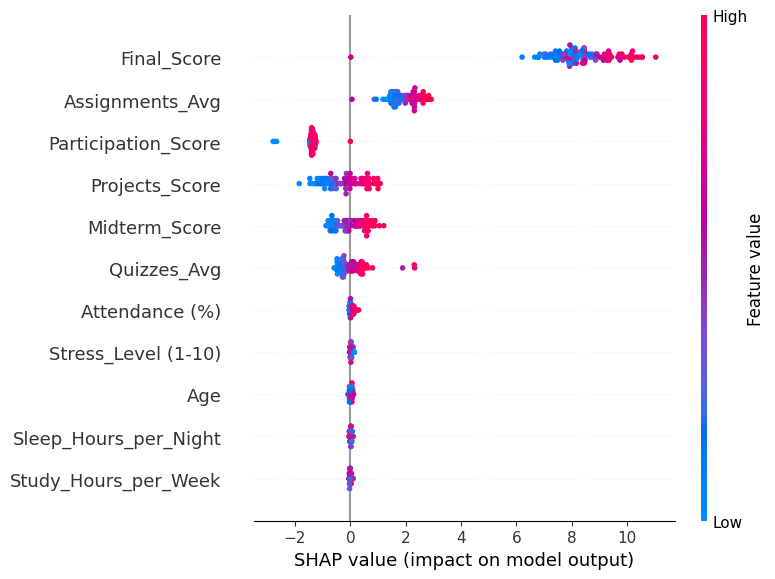

In [15]:
import shap

# Small sample to avoid memory crash
X_test_sample = X_test_num.sample(100, random_state=42)

# SHAP Explainer
explainer = shap.TreeExplainer(model)

# Disable strict additivity check
shap_values = explainer.shap_values(
    X_test_sample,
    check_additivity=False
)

# Global explanation
shap.summary_plot(shap_values, X_test_sample)



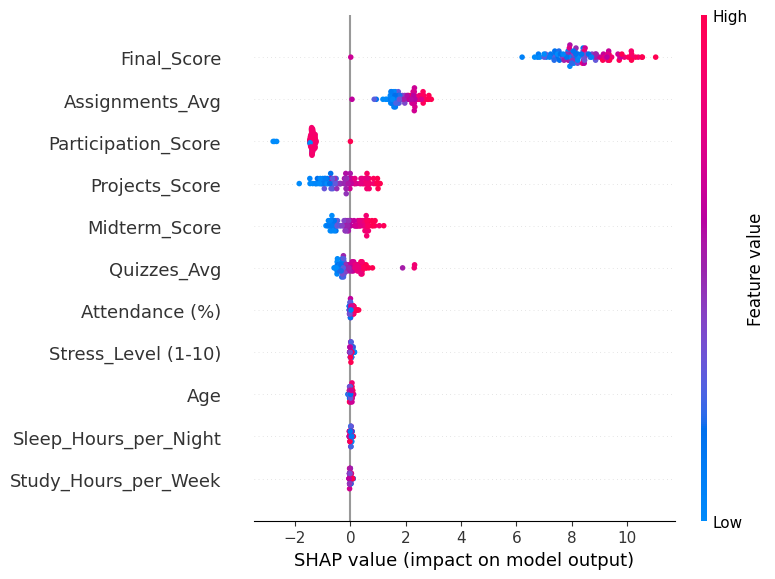

In [16]:
shap.summary_plot(shap_values, X_test_sample)


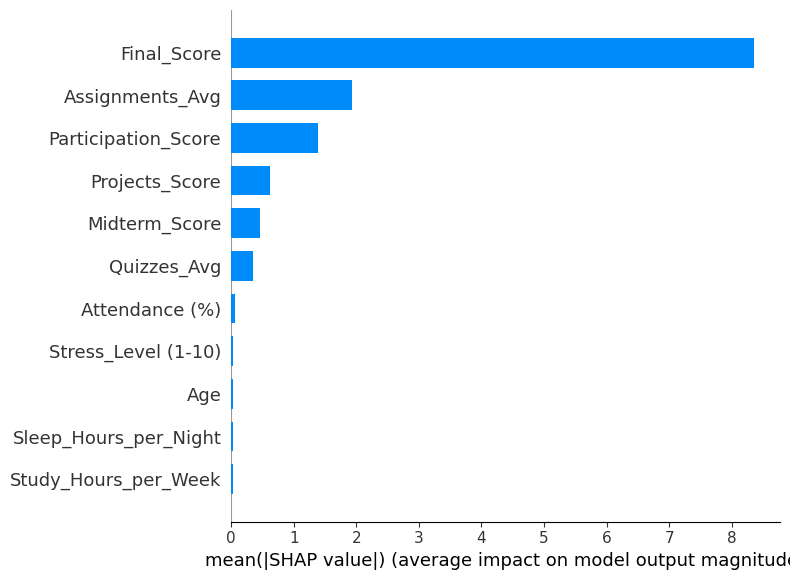

In [17]:
shap.summary_plot(shap_values, X_test_sample, plot_type="bar")



# Week 14: Summary

**Dataset:** cleaned_students.csv  
**Technique Used:** Model Explainability using SHAP (SHapley Additive exPlanations)

### Key Steps:
1. Reviewed ethical principles of AI including transparency, fairness, accountability, and explainability.

2. Selected numerical features used during model training to ensure compatibility with explainability tools.

3. Applied SHAP TreeExplainer to analyze feature contributions for the trained student performance model.

4. Generated global explainability plots to identify the most influential features affecting student performance predictions.

5. Interpreted individual predictions to understand how specific factors positively or negatively impacted the model’s output.

### Insights:
- Attendance, Final Score, Study Hours per Week, and Stress Level were among the most influential features in model predictions.
- SHAP provided clear insight into both global model behavior and individual prediction reasoning.
- Explainability improved confidence in model decisions and helped identify potential bias or unfair influence of features.
- Ethical AI practices are essential when deploying predictive models in sensitive domains such as education.

**Project Milestone:**  
Explainability and ethics component successfully integrated into the project.
The model is now interpretable, transparent, and aligned with responsible AI principles.
This milestone strengthens the project’s real-world applicability and ethical compliance.


